# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Motion Light dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.7 MB/s eta 0:00:00


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time


In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, LCO
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Motion_Light.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2, 50)               │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 50)               │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4998 - loss: 0.6938 - val_accuracy: 0.6500 - val_loss: 0.6929
Epoch 2/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5019 - loss: 0.6936 - val_accuracy: 0.3773 - val_loss: 0.6934
Epoch 3/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4943 - loss: 0.6944 - val_accuracy: 0.3593 - val_loss: 0.6933
Epoch 4/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4999 - loss: 0.6935 - val_accuracy: 0.3373 - val_loss: 0.6934
Epoch 5/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4986 - loss: 0.6939 - val_accuracy: 0.3707 - val_loss: 0.6935
Epoch 6/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4991 - loss: 0.6938 - val_accuracy: 0.4444 - val_loss: 0.6936
Epoch 7/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4998 - loss: 0.6936 - val_accuracy: 0.4343 - val_loss: 0.6936
Epoch 8/70
615/615 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5003 - loss: 0.6936 - val_accuracy: 0.

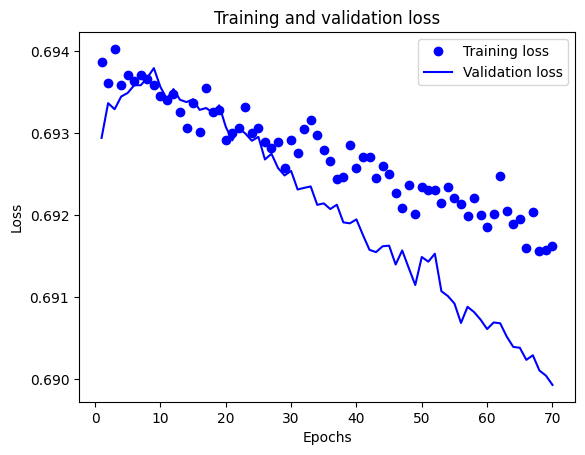

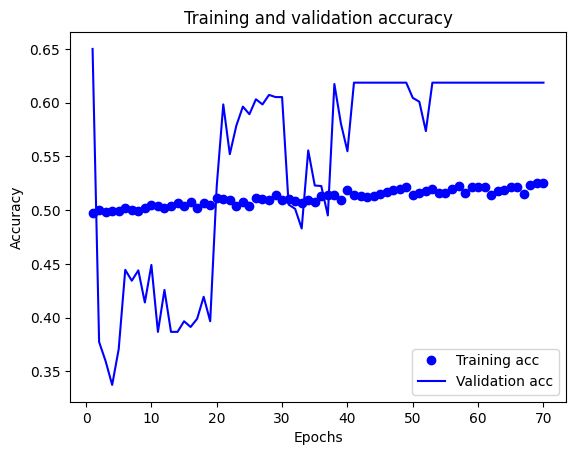


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1556
           1       0.61      1.00      0.75      2393

    accuracy                           0.61      3949
   macro avg       0.30      0.50      0.38      3949
weighted avg       0.37      0.61      0.46      3949


Confusion Matrix
[[   0 1556]
 [   0 2393]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


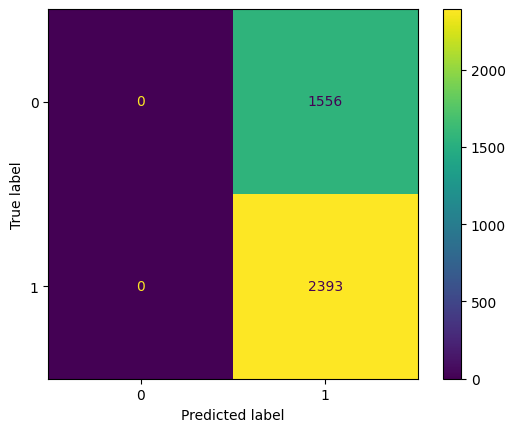

Time taken: 316.0532 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/15 01:59:05 PM, INFO, mealpy.human_based.LCO.OriginalLCO: Solving single objective optimization problem.


Accuracy 0.3813623785972595
Accuracy 0.3494555354118347
Accuracy 0.29551786184310913
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3312230706214905
Accuracy 0.29551786184310913
Accuracy 0.4449227452278137
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.415801465511322
Accuracy 0.6186376214027405
Accuracy 0.4008609652519226
Accuracy 0.3813623785972595
Accuracy 0.4109901189804077
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.289440393447876
Accuracy 0.3033679127693176
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.31881487369537354
Accuracy 0.4087110

2025/04/15 02:49:06 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 1, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1403.60026 seconds


Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.28133702278137207
Accuracy 0.2641174793243408
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6485186219215393
Accuracy 0.2841225862503052
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.6821980178356171
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.2615852355957031
Accuracy 0.27551281452178955


2025/04/15 03:12:28 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 2, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1401.65581 seconds


Accuracy 0.3423651456832886
Accuracy 0.27804505825042725
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.2826032042503357
Accuracy 0.5034185945987701
Accuracy 0.2656368613243103
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3198277950286865
Accuracy 0.3757913112640381
Accuracy 0.3757913112640381
Accuracy 0.6186376214027405
Accuracy 0.3076728582382202
Accuracy 0.29830336570739746
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.2539883255958557
Accuracy 0.6062294244766235


2025/04/15 03:35:02 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 3, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1354.73189 seconds


Accuracy 0.6186376214027405
Accuracy 0.2777918577194214
Accuracy 0.3813623785972595
Accuracy 0.2826032042503357
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.415801465511322
Accuracy 0.2879210114479065
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.32843756675720215
Accuracy 0.3669283390045166
Accuracy 0.2826032042503357
Accuracy 0.5414028763771057
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6062294244766235
Accuracy 0.3813623785972595
Accuracy 0.32843756675720215
Accuracy 0.37351226806640625


2025/04/15 03:58:18 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 4, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1395.87565 seconds


Accuracy 0.6700430512428284
Accuracy 0.3813623785972595
Accuracy 0.3345150947570801
Accuracy 0.31400352716445923
Accuracy 0.260825514793396
Accuracy 0.24613827466964722
Accuracy 0.4251709580421448
Accuracy 0.3813623785972595
Accuracy 0.3251456022262573
Accuracy 0.27500635385513306
Accuracy 0.3813623785972595
Accuracy 0.3998480439186096
Accuracy 0.3757913112640381
Accuracy 0.3813623785972595
Accuracy 0.31881487369537354
Accuracy 0.25044316053390503
Accuracy 0.6482653915882111
Accuracy 0.4872119426727295
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722


2025/04/15 04:19:44 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 5, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1285.99802 seconds


Accuracy 0.2851354479789734
Accuracy 0.35173463821411133
Accuracy 0.2826032042503357
Accuracy 0.24613827466964722
Accuracy 0.3122309446334839
Accuracy 0.29551786184310913
Accuracy 0.27272725105285645
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.3423651456832886
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.4087110757827759
Accuracy 0.2724740505218506
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595


2025/04/15 04:44:26 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 6, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1482.05132 seconds


Accuracy 0.3519878387451172
Accuracy 0.28133702278137207
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.2772853970527649
Accuracy 0.2767789363861084
Accuracy 0.24613827466964722
Accuracy 0.27804505825042725
Accuracy 0.24613827466964722
Accuracy 0.3524942994117737
Accuracy 0.6186376214027405
Accuracy 0.42289185523986816
Accuracy 0.2762724757194519
Accuracy 0.29551786184310913
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3823752999305725
Accuracy 0.24613827466964722
Accuracy 0.4872119426727295
Accuracy 0.3813623785972595


2025/04/15 05:08:18 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 7, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1431.34697 seconds


Accuracy 0.3813623785972595
Accuracy 0.29551786184310913
Accuracy 0.24613827466964722
Accuracy 0.2539883255958557
Accuracy 0.36971384286880493
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.2555077075958252
Accuracy 0.3071663975715637
Accuracy 0.40541911125183105
Accuracy 0.6186376214027405
Accuracy 0.32489240169525146
Accuracy 0.3018485903739929
Accuracy 0.6186376214027405
Accuracy 0.36996710300445557
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.2917194366455078
Accuracy 0.3813623785972595


2025/04/15 05:32:57 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 8, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1479.79576 seconds


Accuracy 0.3198277950286865
Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.36996710300445557
Accuracy 0.27804505825042725
Accuracy 0.3170422911643982
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.6186376214027405
Accuracy 0.27804505825042725
Accuracy 0.6186376214027405
Accuracy 0.3464168310165405
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.2782983183860779
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595


2025/04/15 05:55:20 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 9, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1343.05062 seconds


Accuracy 0.24613827466964722
Accuracy 0.6059761941432953
Accuracy 0.24613827466964722
Accuracy 0.32843756675720215
Accuracy 0.37832361459732056
Accuracy 0.6186376214027405
Accuracy 0.35983794927597046
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.4396049380302429
Accuracy 0.3813623785972595
Accuracy 0.29551786184310913
Accuracy 0.24613827466964722
Accuracy 0.29551786184310913
Accuracy 0.289440393447876
Accuracy 0.27374017238616943
Accuracy 0.3813623785972595
Accuracy 0.3398328423500061
Accuracy 0.2651304006576538


2025/04/15 06:16:42 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 10, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1281.03637 seconds


Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.24613827466964722
Accuracy 0.2826032042503357
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3732590675354004
Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.6186376214027405
Accuracy 0.29551786184310913
Accuracy 0.24613827466964722
Accuracy 0.3471764922142029
Accuracy 0.43985819816589355
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.4411243200302124
Accuracy 0.3757913112640381


2025/04/15 06:31:34 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 11, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 892.47609 seconds


Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.3813623785972595
Accuracy 0.29551786184310913
Accuracy 0.3132438659667969
Accuracy 0.2694352865219116
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.25576096773147583
Accuracy 0.32109397649765015
Accuracy 0.3813623785972595
Accuracy 0.26259809732437134
Accuracy 0.5510255694389343
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.2917194366455078
Accuracy 0.2777918577194214
Accuracy 0.6186376214027405


2025/04/15 06:46:47 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 12, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 912.51649 seconds


Accuracy 0.3813623785972595
Accuracy 0.33021020889282227
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.38516080379486084
Accuracy 0.3813623785972595
Accuracy 0.2826032042503357
Accuracy 0.2826032042503357
Accuracy 0.32843756675720215
Accuracy 0.3813623785972595
Accuracy 0.3757913112640381
Accuracy 0.5809065699577332
Accuracy 0.3813623785972595
Accuracy 0.3015953302383423
Accuracy 0.3813623785972595
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722
Accuracy 0.32843756675720215


2025/04/15 07:03:27 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 13, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1000.07719 seconds


Accuracy 0.24613827466964722
Accuracy 0.24613827466964722
Accuracy 0.32843756675720215
Accuracy 0.24613827466964722
Accuracy 0.3170422911643982
Accuracy 0.3198277950286865
Accuracy 0.3813623785972595
Accuracy 0.2669030427932739
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.27804505825042725
Accuracy 0.29551786184310913
Accuracy 0.5343124866485596
Accuracy 0.49658143520355225
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.6186376214027405
Accuracy 0.24613827466964722


2025/04/15 07:27:02 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 14, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1414.99125 seconds


Accuracy 0.6186376214027405
Accuracy 0.30463409423828125
Accuracy 0.32843756675720215
Accuracy 0.3813623785972595
Accuracy 0.2914661765098572
Accuracy 0.2699417471885681
Accuracy 0.3813623785972595
Accuracy 0.24613827466964722
Accuracy 0.3757913112640381
Accuracy 0.24613827466964722
Accuracy 0.6186376214027405
Accuracy 0.3813623785972595
Accuracy 0.5343124866485596
Accuracy 0.3813623785972595
Accuracy 0.3813623785972595
Accuracy 0.2826032042503357
Accuracy 0.3813623785972595
Accuracy 0.6062294244766235
Accuracy 0.3813623785972595
Accuracy 0.2826032042503357


2025/04/15 07:46:40 PM, INFO, mealpy.human_based.LCO.OriginalLCO: >>>Problem: P, Epoch: 15, Current best: 0.24613827466964722, Global best: 0.24613827466964722, Runtime: 1178.84263 seconds


Accuracy 0.6186376214027405
Solution: [0.48891375 5.41430257 5.4409623  0.35435592 0.32614669], Fitness: 0.24613827466964722
Solution: [0.48891375 5.41430257 5.4409623  0.35435592 0.32614669], Fitness: 0.24613827466964722


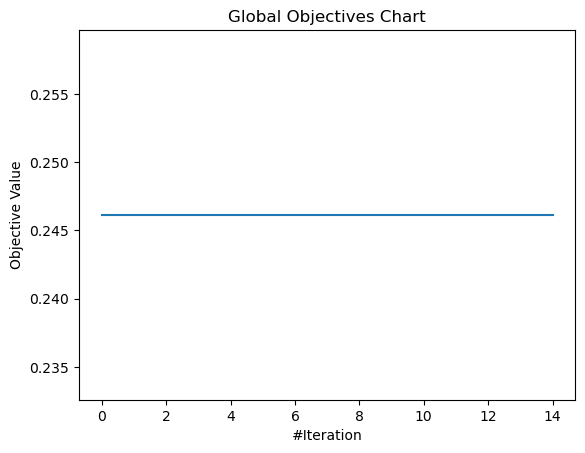

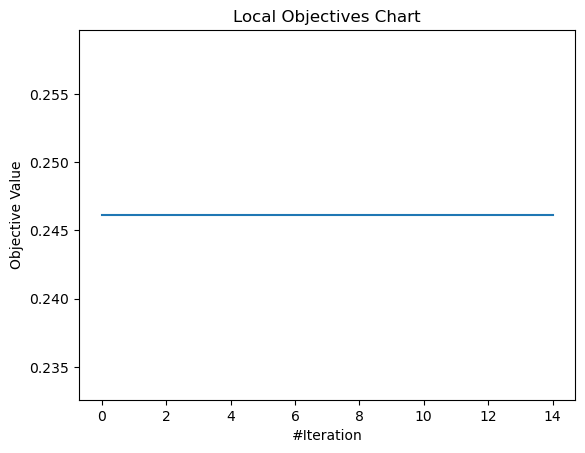

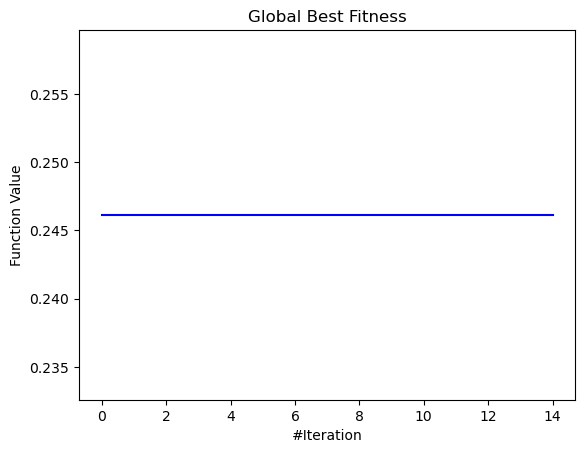

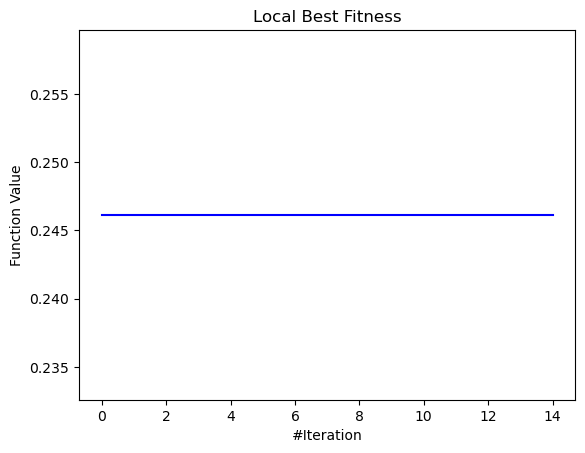

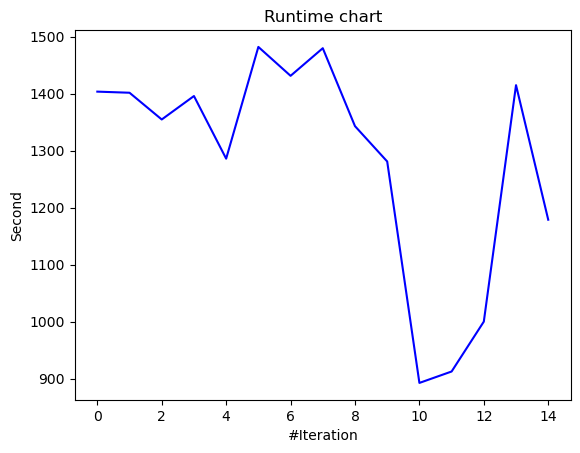

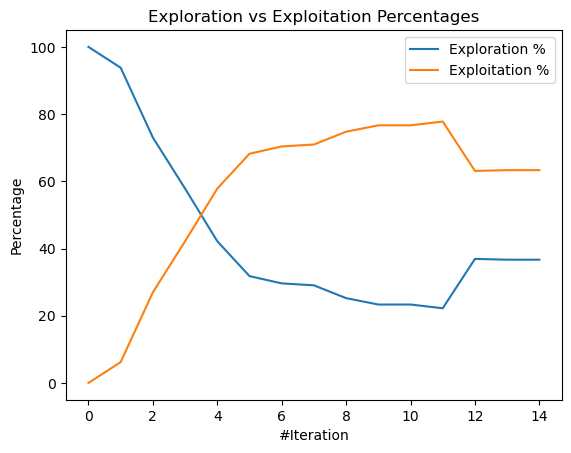

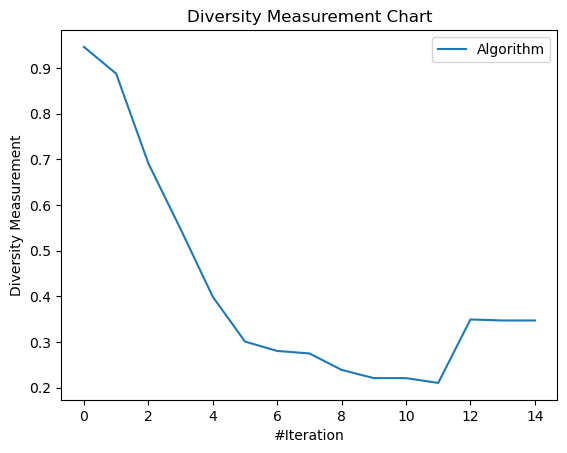

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = LCO.OriginalLCO(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="motion_light_lco/goc")
model.history.save_local_objectives_chart(filename="motion_light_lco/loc")

model.history.save_global_best_fitness_chart(filename="motion_light_lco/gbfc")
model.history.save_local_best_fitness_chart(filename="motion_light_lco/lbfc")

model.history.save_runtime_chart(filename="motion_light_lco/rtc")

model.history.save_exploration_exploitation_chart(filename="motion_light_lco/eec")

model.history.save_diversity_chart(filename="motion_light_lco/dc")


Solution: [0.48891375 5.41430257 5.4409623  0.35435592 0.32614669], Fitness: 0.24613827466964722

Batch Size - **32**, 64, 128

Activation - softmax, softplus, relu, tanh, sigmoid, **hard_sigmoid**, linear

Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, **0.1**

Filters - **25**, 50, 75

Hidden Units - **400**, 512, 640

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 25)               │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 25)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 25)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 25)               │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          23,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │          26,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,641 (193.91 KB)

 Trainable params: 49,591 (193.71 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4996 - loss: 0.9706 - val_accuracy: 0.6186 - val_loss: 0.7016
Epoch 2/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4976 - loss: 0.9594 - val_accuracy: 0.6186 - val_loss: 0.7668
Epoch 3/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4963 - loss: 0.9309 - val_accuracy: 0.3814 - val_loss: 1.1538
Epoch 4/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4992 - loss: 0.8828 - val_accuracy: 0.3814 - val_loss: 1.2514
Epoch 5/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5031 - loss: 0.8678 - val_accuracy: 0.6186 - val_loss: 1.0341
Epoch 6/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5106 - loss: 0.8422 - val_accuracy: 0.3814 - val_loss: 1.3211
Epoch 7/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5124 - loss: 0.8301 - val_accuracy: 0.6186 - val_loss: 0.6767
Epoch 8/70
1229/1229 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5401 - loss: 0.7828 - 

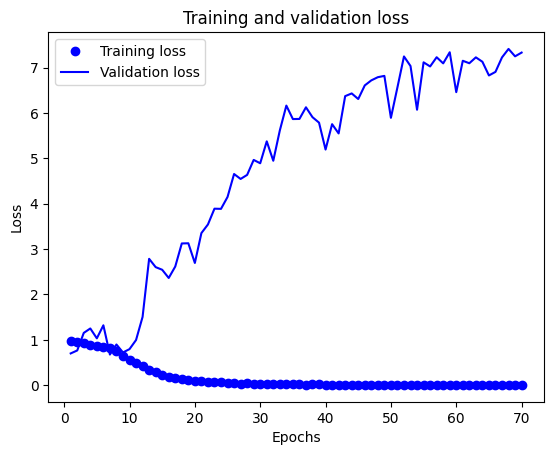

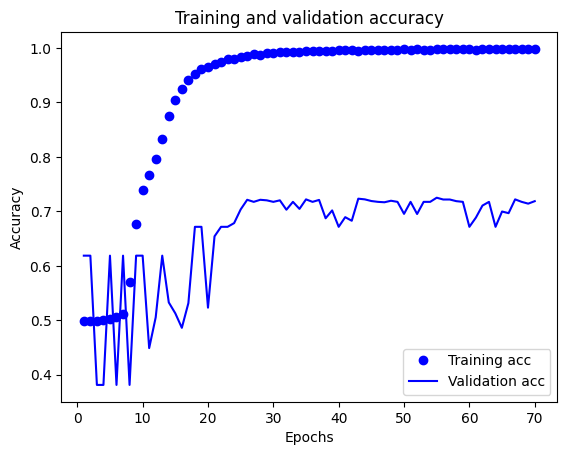


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.34      0.47      1556
           1       0.69      0.94      0.79      2393

    accuracy                           0.70      3949
   macro avg       0.73      0.64      0.63      3949
weighted avg       0.72      0.70      0.67      3949


Confusion Matrix
[[ 526 1030]
 [ 146 2247]]


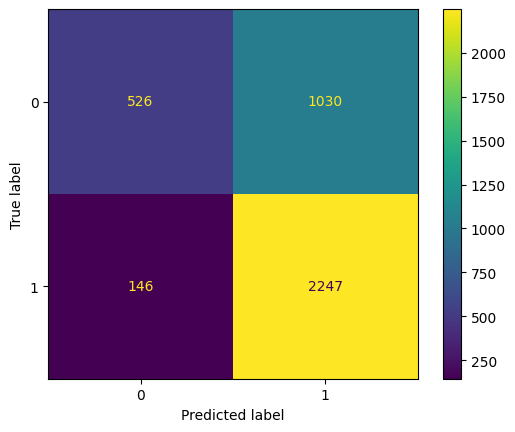

Time taken: 480.7598 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(400, activation='hard_sigmoid'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.1)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=32, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")
